In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [60]:
#import the data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### From the above, we can see that, 'sqft_above' is missing 2 data points. All the other columns are complete and have no missing data. Let's start by converting only waterfront,view and the condition variables for now

In [4]:
#creating a new df with the predictor variables. 'price' is what we're looking to predict.
categories = ['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','zipcode','price',
              'yr_renovated','sqft_above','sqft_basement']
data = df[categories]
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,price,yr_renovated,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,0,0,3,98178,221900.0,0,1180.0,0
1,3,2.25,2570,7242,2.0,0,0,3,98125,538000.0,1991,2170.0,400
2,2,1.00,770,10000,1.0,0,0,3,98028,180000.0,0,770.0,0
3,4,3.00,1960,5000,1.0,0,0,5,98136,604000.0,0,1050.0,910
4,3,2.00,1680,8080,1.0,0,0,3,98074,510000.0,0,1680.0,0


##### Identifying categorical variables

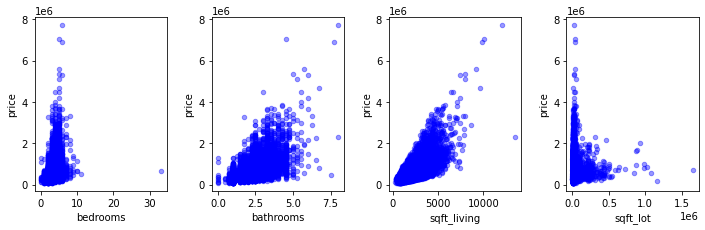

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['bedrooms', 'bathrooms','sqft_living','sqft_lot'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

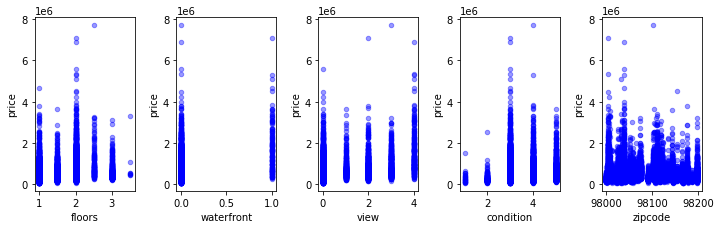

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['floors','waterfront','view','condition','zipcode'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

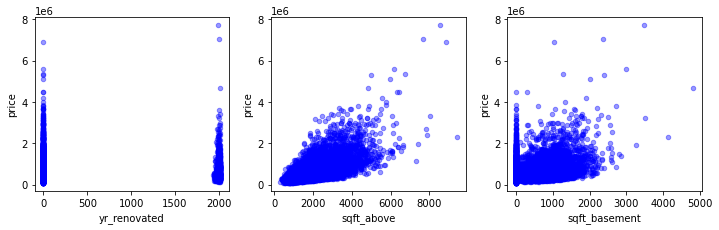

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['yr_renovated','sqft_above','sqft_basement'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### From the plots, it is clear that floors, waterfront,view, zipcode and condition are categorical variables

#### Let's start with only the waterfront, view and condition variables

In [8]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [9]:
data['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [10]:
data['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

#### Since waterfront has only 2 categories, we can use OrdinalEncoder to generate binary values

In [11]:
from sklearn.preprocessing import OrdinalEncoder

waterfront = data[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront)
waterfront_encoded = encoder_waterfront.transform(waterfront)
waterfront_encoded

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [12]:
# Replacing the original waterfront values with the encoded values
data['waterfront'] = waterfront_encoded

In [13]:
# renaming the waterfront column
data.rename(columns = {'waterfront':'waterfront_encoded'},inplace = True)

#### Since floors, view and condition have multiple categories, we can use OneHotEncoder.Each category will be transformed into a new column and assigned binary values. We will then convert them to a df and add them to the original df to make it easier to read and create our model

In [14]:
# transforming 'view'

from sklearn.preprocessing import OneHotEncoder

view = data[['view']]
view_encoder = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
view_encoder.fit(view)
view_encoded = view_encoder.transform(view)
view_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [15]:
#converting to a df
view_encoded_df = pd.DataFrame(view_encoded, index = data.index)
view_encoded_df

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21608,1.0,0.0,0.0,0.0,0.0
21609,1.0,0.0,0.0,0.0,0.0
21610,1.0,0.0,0.0,0.0,0.0
21611,1.0,0.0,0.0,0.0,0.0


In [16]:
# creating new names for the columns
old_names = view_encoded_df.columns
new_names = ['view_0', 'view_1', 'view_2', 'view_3', 'view_4']
names = dict(zip(old_names, new_names))

In [17]:
# renaming the columns so better readability
view_encoded_df.rename(columns=names,inplace=True)
view_encoded_df

,view_0,view_1,view_2,view_3,view_4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21608,1.0,0.0,0.0,0.0,0.0
21609,1.0,0.0,0.0,0.0,0.0
21610,1.0,0.0,0.0,0.0,0.0
21611,1.0,0.0,0.0,0.0,0.0


In [18]:
# appending the view_encoded_df to the datadf
data.drop('view',axis=1,inplace=True)
data = pd.concat([data,view_encoded_df],axis=1)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_encoded,condition,zipcode,price,yr_renovated,sqft_above,sqft_basement,view_0,view_1,view_2,view_3,view_4
0,3,1.00,1180,5650,1.0,0.0,3,98178,221900.0,0,1180.0,0,1.0,0.0,0.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0.0,3,98125,538000.0,1991,2170.0,400,1.0,0.0,0.0,0.0,0.0
2,2,1.00,770,10000,1.0,0.0,3,98028,180000.0,0,770.0,0,1.0,0.0,0.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0.0,5,98136,604000.0,0,1050.0,910,1.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,8080,1.0,0.0,3,98074,510000.0,0,1680.0,0,1.0,0.0,0.0,0.0,0.0


In [19]:
# transforming 'condition'using OneHotEncoder
condition = data[['condition']]
condition_encoder = OneHotEncoder(categories='auto',sparse=False,handle_unknown='ignore')
condition_encoder.fit(condition)
condition_encoded = condition_encoder.transform(condition)
condition_encoded

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [20]:
#converting the encoded values into a df
condition_encoded_df = pd.DataFrame(condition_encoded,index=data.index)
condition_encoded_df.head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0


In [21]:
#renaming the columns
old_names= condition_encoded_df.columns
new_names = ['condition_0','condition_1','condition_2','condition_3','condition_4']
names = dict(zip(old_names,new_names))

condition_encoded_df.rename(columns=names,inplace=True)
condition_encoded_df

,condition_0,condition_1,condition_2,condition_3,condition_4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
21608,0.0,0.0,1.0,0.0,0.0
21609,0.0,0.0,1.0,0.0,0.0
21610,0.0,0.0,1.0,0.0,0.0
21611,0.0,0.0,1.0,0.0,0.0


In [22]:
#adding to the original data df
data.drop('condition',axis=1,inplace=True)
data = pd.concat([data,condition_encoded_df],axis=1)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_encoded,zipcode,price,yr_renovated,sqft_above,...,view_0,view_1,view_2,view_3,view_4,condition_0,condition_1,condition_2,condition_3,condition_4
0,3,1.00,1180,5650,1.0,0.0,98178,221900.0,0,1180.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0.0,98125,538000.0,1991,2170.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.00,770,10000,1.0,0.0,98028,180000.0,0,770.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0.0,98136,604000.0,0,1050.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,2.00,1680,8080,1.0,0.0,98074,510000.0,0,1680.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21613 non-null  int64  
 1   bathrooms           21613 non-null  float64
 2   sqft_living         21613 non-null  int64  
 3   sqft_lot            21613 non-null  int64  
 4   floors              21613 non-null  float64
 5   waterfront_encoded  21613 non-null  float64
 6   zipcode             21613 non-null  int64  
 7   price               21613 non-null  float64
 8   yr_renovated        21613 non-null  int64  
 9   sqft_above          21611 non-null  float64
 10  sqft_basement       21613 non-null  int64  
 11  view_0              21613 non-null  float64
 12  view_1              21613 non-null  float64
 13  view_2              21613 non-null  float64
 14  view_3              21613 non-null  float64
 15  view_4              21613 non-null  float64
 16  cond

In [24]:
# sqft_above has missing values
data['sqft_above'].isna().value_counts()

False    21611
True         2
Name: sqft_above, dtype: int64

In [25]:
data['sqft_above'].describe()

count    21611.000000
mean      1788.396095
std        828.128162
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [26]:
#imputing the median value
median = data['sqft_above'].median()
data['sqft_above'].fillna(median,inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21613 non-null  int64  
 1   bathrooms           21613 non-null  float64
 2   sqft_living         21613 non-null  int64  
 3   sqft_lot            21613 non-null  int64  
 4   floors              21613 non-null  float64
 5   waterfront_encoded  21613 non-null  float64
 6   zipcode             21613 non-null  int64  
 7   price               21613 non-null  float64
 8   yr_renovated        21613 non-null  int64  
 9   sqft_above          21613 non-null  float64
 10  sqft_basement       21613 non-null  int64  
 11  view_0              21613 non-null  float64
 12  view_1              21613 non-null  float64
 13  view_2              21613 non-null  float64
 14  view_3              21613 non-null  float64
 15  view_4              21613 non-null  float64
 16  cond

In [28]:
#creating X and y for modelling
y=df['price']
X=data

In [29]:
# creating train and test splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50)

In [30]:
# checking the shape of the datasets
print(f'shape of X_train is {X_train.shape}')
print(f'shape of y_train is {y_train.shape}')
print(f'shape of X_test is {X_test.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of X_train is (16209, 21)
shape of y_train is (16209,)
shape of X_test is (5404, 21)
shape of y_test is (5404,)


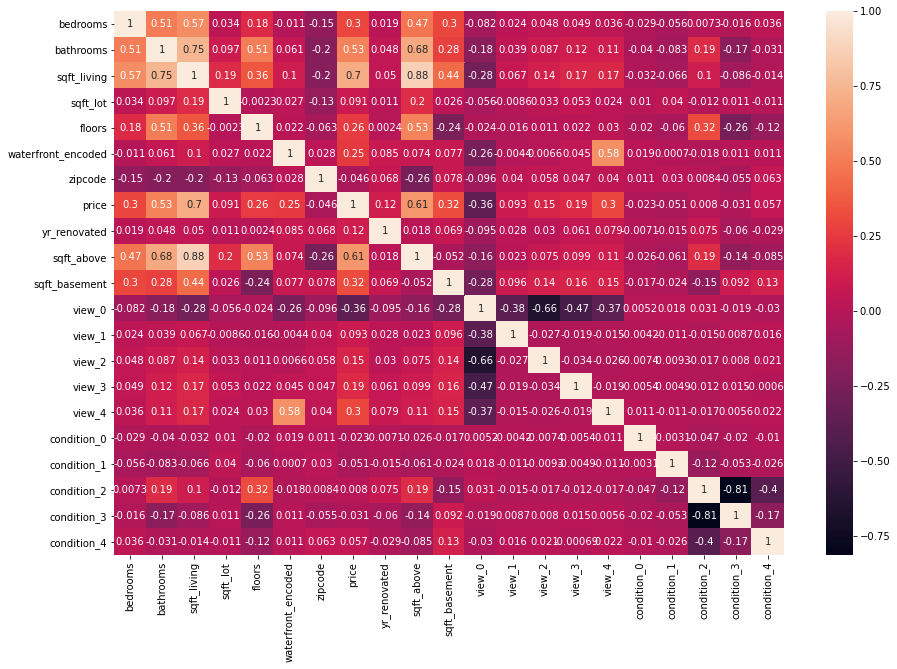

In [31]:
# visualizing co-realtion values
fig,ax = plt.subplots(figsize=(15,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True,ax=ax);

### From the heatmap, it is apparent that having encoded values makes no sense since the values are mostly 0 and even negative.This will have an adverse impact on the model and so it's best to revert to the orginal dataset for the modelling.

In [32]:
X = df
X.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
# dropping irrelevant columns
X.drop(['id','date','sqft_living15','sqft_lot15'],axis=1,inplace=True)
X.drop(['lat','long'],axis=1,inplace=True)
X.drop('price',axis=1,inplace=True)

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21611 non-null  float64
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [35]:
#imputing the median value
X['sqft_above'].fillna(median,inplace=True)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  float64
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [37]:
#splitting the data into train and test splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50)

print(f'shape of X_train is {X_train.shape}')
print(f'shape of y_train is {y_train.shape}')
print(f'shape of X_test is {X_test.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of X_train is (16209, 14)
shape of y_train is (16209,)
shape of X_test is (5404, 14)
shape of y_test is (5404,)


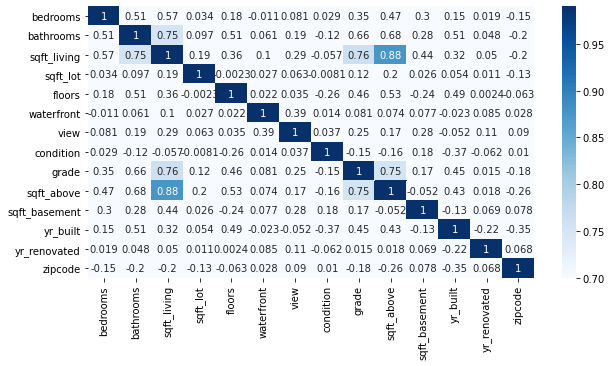

In [38]:
# visualizing the co-relation values on the train dataset
fig,ax = plt.subplots(figsize=(10,5))
corr = X_train.corr()
# filtering the correlation values using vmin and vmax 
sns.heatmap(corr,annot=True,vmin=0.70,vmax=0.99,cmap='Blues');

#### From the heatmap, we can see that the following pairs of variables are coorelation values > 0.75: (sqft_living,bathrooms),(sqft_living,sqft_above), (sqft_living,grade),(grade,sqft_above)


#### From the column name explaination, sqft_living refers to the living area and the sqft_bove refers to the area exculding the basement. Examining both columns:

In [39]:
X_train.loc[:,['sqft_living', 'sqft_above']]

,sqft_living,sqft_above
9526,830,830.0
14250,820,820.0
11969,1090,1090.0
20116,1340,940.0
5815,1890,1290.0
...,...,...
14565,3800,2490.0
15649,1940,1940.0
10123,1890,1890.0
5600,4020,4020.0


#### Since they both have the same values, we can eliminate one for modelling purposes. Let's remove sqft_above from the dataset

In [40]:
X_train.drop('sqft_above',axis=1,inplace=True)
X_test.drop('sqft_above',axis=1,inplace=True)

In [41]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
9526,2,1.00,830,6017,1.0,0,0,4,6,0,1954,0,98133
14250,2,1.00,820,16030,1.0,0,0,4,5,0,1923,0,98022
11969,3,1.00,1090,10296,1.0,0,0,4,6,0,1950,0,98028
20116,2,2.50,1340,999,2.0,0,0,3,8,400,2008,0,98116
5815,3,1.75,1890,3825,1.0,0,0,3,7,600,1974,0,98117


In [42]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
5533,3,1.75,1660,4800,1.0,0,0,3,7,700,1941,1996,98116
625,3,1.00,960,6400,1.0,0,0,4,6,140,1944,0,98178
20463,3,2.50,2730,7136,2.0,0,0,3,8,0,2012,0,98198
9965,3,2.25,2900,35273,2.0,0,0,3,9,0,1986,0,98038
3929,3,2.25,1590,7267,1.0,0,0,4,7,490,1976,0,98133


#### As expected, we now have : (sqft_living,bathrooms), (sqft_living,grade). From the King's county website, grade is defined as the,quality of construction i.e materials, design, finish, workmanship etc. Naturally, a higher grade would mean a higher quality of house and would be more desirable for prospective buyers. Sqft_living refers to the carpet area of the house and bathrooms refers to the number of bathrooms in the house

### Let's build our baseline model using sqft_living since size is the first thing buyers will look at

In [43]:
#importing the linear regression library
from sklearn.linear_model import LinearRegression

In [44]:
# getting the values for the train set
#instantiate linear regression and fit it onto the data
baseline_model_train = LinearRegression()
baseline_model_train.fit(X_train[['sqft_living']],y_train)
#get the cocft values 
cocft_train = baseline_model_train.coef_
intercept_train = baseline_model_train.intercept_
print(f'value of m = {cocft_train}')
print(f'value of c = {intercept_train}')

value of m = [279.13571467]
value of c = -41849.63133937307


In [45]:
# getting the values for the test set
#instantiate linear regression and fit it onto the data
baseline_model_test = LinearRegression()
baseline_model_test.fit(X_test[['sqft_living']],y_test)
#get the cocft values 
cocft_test = baseline_model_test.coef_
intercept_test = baseline_model_test.intercept_
print(f'value of m = {cocft_test}')
print(f'value of c = {intercept_test}')

value of m = [285.16673501]
value of c = -48890.560860857484


#### Use cross-validation using 5 splits and on the train and test data sets and compare R2 values

In [46]:
# importing the cross-validate library
from sklearn.model_selection import cross_val_score
#getting the scores for the train data
train_scores = cross_val_score(estimator=baseline_model_train,X=X_train[['sqft_living']],y=y_train)
#gettting the average R2 score for the train set across 5 splits
train_score_average = np.mean(train_scores)
#getting the scores for the test data
test_scores = cross_val_score(baseline_model_test,X=X_test[['sqft_living']],y=y_test)
#getting the R2 score for the test set
test_score_average = np.mean(test_scores)
# comparing the R2 values between the train and the test set 
print(f'average train set score is {train_score_average}')
print(f'average test set score is {test_score_average}')

average train set score is 0.4923720157864876
average test set score is 0.4839616012366732


In [47]:
# using shuffle split to see if we get better. Shuffle split splits the data set furhter by the number of splits specified
# and runs the regression model
from sklearn.model_selection import cross_validate, ShuffleSplit
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

train_scores = cross_val_score(estimator=baseline_model_train,X=X_train[['sqft_living']],y=y_train,cv=splitter)
test_scores = cross_val_score(estimator=baseline_model_test,X=X_test[['sqft_living']],y=y_test,cv=splitter)

avg_train_scores_baseline_model = np.mean(train_scores)
avg_test_scores_baseline_model = np.mean(test_scores)

print(f'average train set score for the baseline model is {avg_train_scores_baseline_model}')
print(f'average test set score for the baseline model  is {avg_test_scores_baseline_model}')

average train set score for the baseline model is 0.480617729343185
average test set score for the baseline model  is 0.4911235529165578


#### Looking at the R2 values for (sqft_living,price), we can conclude that nearly 50% of the variance in the price is can be attribute to the size of the house, which make sense, since size is the first thing people look at when buying a house. Next step is to add the other variables (grade,bathroom) too see how the model works.

In [48]:
# adding the variable grade to the model

#instantiate linear regression and fit it onto the data
second_model_train = LinearRegression()
second_model_test = LinearRegression()

train_scores = cross_val_score(estimator=second_model_train,X=X_train[['sqft_living','grade']],y=y_train,cv=splitter)
test_scores = cross_val_score(estimator=second_model_test,X=X_test[['sqft_living','grade']],y=y_test,cv=splitter)

avg_train_scores_second_model = np.mean(train_scores)
avg_test_scores_second_model = np.mean(test_scores)

print(f'average train set score for the baseline model is {avg_train_scores_baseline_model}')
print(f'average test set score for the baseline model  is {avg_test_scores_baseline_model}\n')

print(f'average train set score for the second model is {avg_train_scores_second_model}')
print(f'average test set score for the second model is {avg_test_scores_second_model}')

average train set score for the baseline model is 0.480617729343185
average test set score for the baseline model  is 0.4911235529165578

average train set score for the second model is 0.5278798538859325
average test set score for the second model is 0.5243958181485234


###### Looks like the R2 values for the model has imporved

In [49]:
# adding the thrird most correlated varibale : bathrooms

#instantiate linear regression and fit it onto the data
third_model_train = LinearRegression()
third_model_test = LinearRegression()

train_scores = cross_val_score(estimator=third_model_train,X=X_train[['sqft_living','grade','bathrooms']],y=y_train,cv=splitter)
test_scores = cross_val_score(estimator=third_model_test,X=X_test[['sqft_living','grade','bathrooms']],y=y_test,cv=splitter)

avg_train_scores_third_model = np.mean(train_scores)
avg_test_scores_third_model = np.mean(test_scores)

print(f'average train set score for the baseline model is {avg_train_scores_baseline_model}')
print(f'average test set score for the baseline model  is {avg_test_scores_baseline_model}\n')

print(f'average train set score for the second model is {avg_train_scores_second_model}')
print(f'average test set score for the second model is {avg_test_scores_second_model}\n')

print(f'average train set score for the third model is {avg_train_scores_third_model}')
print(f'average test set score for the third model is {avg_test_scores_third_model}')

average train set score for the baseline model is 0.480617729343185
average test set score for the baseline model  is 0.4911235529165578

average train set score for the second model is 0.5278798538859325
average test set score for the second model is 0.5243958181485234

average train set score for the third model is 0.5296780460745726
average test set score for the third model is 0.5295249911539154
